# Principal Component Analysis

PCA is a really useful tool for data analysis.  It can be used to lessen the storage/computation requirements for a dataset via dimensionality reduction.  This involves a coordinate transformation from the original feature space to a space defined by the principal components, which are linear recombinations of those features.  It can be quite powerful, reducing a data set from 1000s of features to a handful, which can reproduce ~99% of the variance in the sample.

Another powerful use of PCA is for data mining and explanatory data models.  Using the principal components, we can understand the relationships in the data that describe the largest variations away from the mean behavior.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn.decomposition import PCA
import seaborn as sns

%matplotlib inline

The data we will use is a sample of ~1000 randomly generated ice cream sundaes.  We have different flavors of Amy's Ice Creams, various amounts of toppings, and the corresponding calories per sundae.  

In [2]:
# Import the data.
sundae_df = pd.read_csv('IceCreamSundaes.csv',index_col=0)

In [3]:
sundae_df.head()

,flavor,ice_cream,hot_fudge,caramel,marshmallow,whipped_cream,nuts,cherry,banana,calories
0,mexican vanilla,2,1.148357,1.006107,1.148357,1.075702,0.894144,0,9,746.832542
1,vanilla,1,2.597446,0.533145,2.597446,0.876489,0.796314,0,14,891.840727
2,triplemex,3,0.770729,0.704538,0.770729,0.958124,0.387373,0,3,707.909387
3,mexican vanilla,2,1.279331,1.302984,0.779331,1.274607,1.121143,1,6,771.844228
4,vanilla,1,0.168636,5.892522,0.331364,0.669663,0.482418,0,8,965.657682


### Relationships in the data
Before we get started, let's have a look at the data.  What relationships do you notice?  Take a moment on Slack to share the relationships you notice in the data.

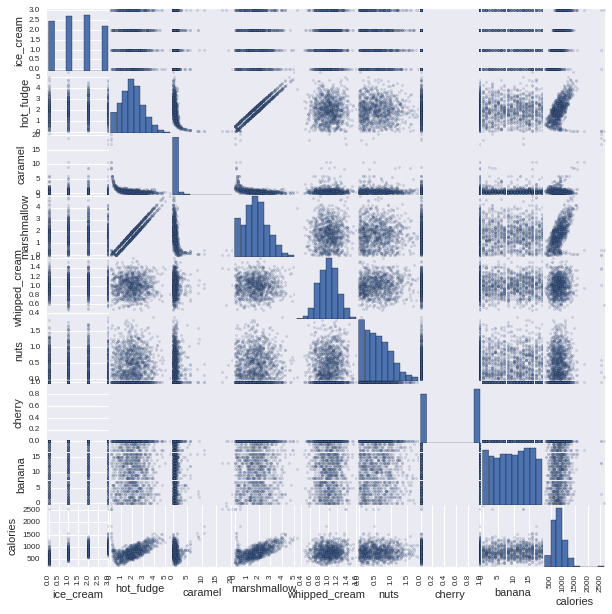

In [14]:
# A scatter plot is a grid of every feature vs. every other feature.  Along the diagonal, where the feature would be
# plotted against itself, a kernal density estimate is plotted, showing the distribution of values for that feature.

scatter_matrix(sundae_df, alpha=0.2, figsize=(10, 10))
plt.show()

If you haven't, note the range of values for each feature.  When PCA looks for the main driver of variation in the data, what do you think it will find?  (I.e. what will be responsible for the biggest numerical difference from one sundae to the next?)

In [5]:
#prep data for PCA

del sundae_df['flavor'] #remove text column
X = sundae_df/np.std(sundae_df) #divide by stddev to normalize data

In order to find the largest variations, PCA needs to know how the data behaves on average.  It calculates the means for each feature and subtracts them from the data under the hood, then proceeds to calculate the covariance matrix.

In [6]:
# Applying a PCA is really easy.

pca = PCA() # Initialize the class.
pca.fit(X) # Find the PCs.

# Done.

PCA(copy=True, n_components=None, whiten=False)

### Reducing Dimensions

Ok, we've run a PCA.  How do we know how many principal components (PCs) to keep?

In [7]:
# Look at the amount of the variance in the data set represented in each PC.
print(pca.explained_variance_ratio_) 

[  2.77938875e-01   1.79866056e-01   1.21491334e-01   1.13201880e-01
   1.08031693e-01   1.02238090e-01   9.38883661e-02   3.34370568e-03
   1.94017280e-32]


<IPython.core.display.Javascript object>


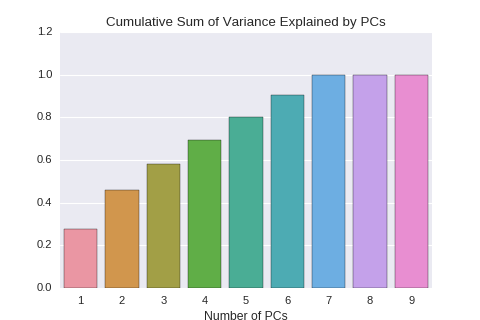

In [8]:
fig1 = plt.figure(figsize=(6,4))
ax1 = fig1.add_subplot(111)

PCnums = [x+1 for x in range(len(pca.explained_variance_ratio_))]
sns.barplot(PCnums,np.cumsum(pca.explained_variance_ratio_),ax=ax1)

ax1.set_title('Cumulative Sum of Variance Explained by PCs')
ax1.set_xlabel('Number of PCs')

#### How many PCs do you think we should keep and why?
Talk with your group about how many PCs you think are necessary.  Share on Slack when you decide.  

In [15]:
#Enter the number of PCs you want to keep below as numPCs.
numPCs = 6

### Transforming Coordinates
How do we take the PCs to reduce the size of our data set?

First, let's take a look at the PCs themselves.

In [16]:
# The pca class has several attributes associated with it, which end in '_'.  
# pca.components_ yields the contribution of each feature to each PC.
# For PC1 (row 0), there is a -0.155670 contribution from ice_cream, etc.  
# We will evaluate what these numbers mean shortly.  

# For now, we can use them to transform our data and reduce our dimensions.

pca_df = pd.DataFrame(pca.components_, columns = sundae_df.columns)
pca_df.head(3)

,ice_cream,hot_fudge,caramel,marshmallow,whipped_cream,nuts,cherry,banana,calories
0,-0.155670,-0.606177,0.246303,-0.606962,-0.017772,0.013705,0.026366,-0.041558,-0.419907
1,0.546071,-0.172322,0.560373,-0.140356,0.102219,-0.052740,0.007451,0.029065,0.569441
2,-0.123022,-0.014228,0.014561,-0.002491,0.449151,0.643123,0.298577,0.527027,0.046856


In [17]:
# Let's recreate one of our sundaes.  Say sundae #5.
X.iloc[5,:]

ice_cream        2.771332
hot_fudge        1.461600
caramel          0.805457
marshmallow      1.456110
whipped_cream    5.824293
nuts             4.541099
cherry           2.002832
banana           2.608315
calories         4.026049
Name: 5, dtype: float64

In [18]:
# We need to know how much of each PC to add to the mean to recreate Sundae #5.  These are called the weights.
weights = pca.transform(X)
weights[5]

array([  5.60458846e-03,   1.49430461e+00,   3.03410509e+00,
        -3.58302299e-01,  -5.43503399e-02,  -1.28094359e+00,
         1.46374692e+00,   1.42004452e-01,   5.47762737e-17])

In [22]:
# If you know you're going to use PCA to transform your data, you can 
# run the PCA and the transformation all in one step:
weights = pca.fit_transform(X)

In [23]:
mean = pd.DataFrame([pca.mean_],columns = sundae_df.columns)
meanPCs = pd.concat([mean,pca_df[0:numPCs]])
meanPCs = meanPCs.reset_index(drop=True)
meanPCs

,ice_cream,hot_fudge,caramel,marshmallow,whipped_cream,nuts,cherry,banana,calories
0,1.357406,2.025628,0.610790,1.785681,4.974477,1.444562,1.054651,1.663356,3.127664
1,-0.155670,-0.606177,0.246303,-0.606962,-0.017772,0.013705,0.026366,-0.041558,-0.419907
2,0.546071,-0.172322,0.560373,-0.140356,0.102219,-0.052740,0.007451,0.029065,0.569441
3,-0.123022,-0.014228,0.014561,-0.002491,0.449151,0.643123,0.298577,0.527027,0.046856
4,-0.010665,-0.008451,0.010548,-0.000430,-0.521853,-0.316095,0.644348,0.459774,0.029686
5,-0.140435,-0.007823,0.145079,0.004395,-0.479731,0.194487,-0.658941,0.500926,0.077801
6,0.057705,-0.033453,-0.150654,-0.046215,0.511540,-0.630066,-0.239905,0.494300,-0.100867


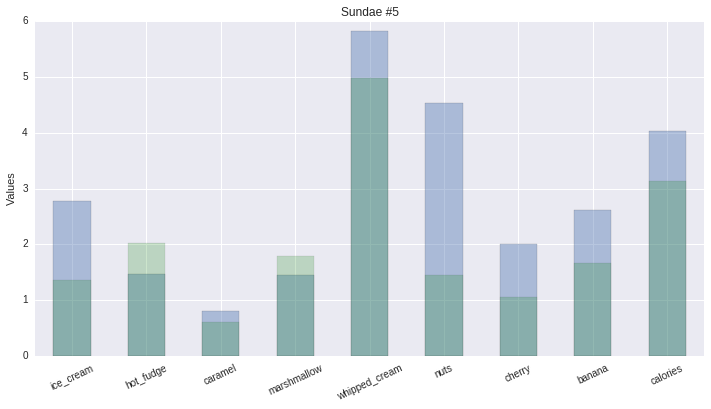

In [27]:
# Let's visualize what sundae #5 looks like.
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# plot sundae #5
X.iloc[5,:].plot(ax=ax,kind='bar',alpha=0.4)

# Uncomment the next line and run this cell to additionally plot mean values for dataset
meanPCs.iloc[0].plot(ax=ax,kind='bar',alpha=0.2,color='g')

ax.set_ylabel('Values')
ax.set_title('Sundae #5')
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=25)
plt.show()

Describe sundae #5 on Slack.  Would you eat it?

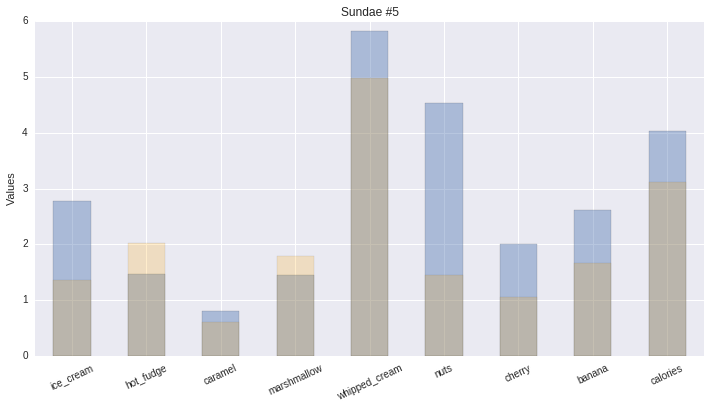

In [26]:
# Let's visualize what sundae #5 looks like.
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# plot sundae #5
X.iloc[5,:].plot(ax=ax,kind='bar',alpha=0.4)

# Now we need to add weight*PC for each PC you want to include.  Try adding one PC at a time.
# First, we'll start with just the mean + PC1.
sundae5 = meanPCs.iloc[0] + weights[5][0]*meanPCs.iloc[1]

sundae5.plot(ax=ax,kind='bar',alpha=0.2,color='orange')

ax.set_ylabel('Values')
ax.set_title('Sundae #5')
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=25)
plt.show()

Go back and revise the previous plot.  Continue to add weights x PCs to your sundae #5 reconstruction and see how the plot evolves.  

#### Does the reconstruction get closer to the data with additional PCs?

#### Remember where we came from:
You should notice that you come very close to recreating sundae #5 from our X data set that we inputted to the PCA.  Recall that we divided the original data, sundae_df, by the standard deviation.  So to truly recover the original data, you would need to multiply your reconstructed sundae #5 by the standard deviation.

### Interpreting PCA

Coming back to PCA as a tool for data mining and explanatory models, let's investigate our PCs in more detail.

In [28]:
# let's look again at our DF of the sample means + PCs
meanPCs

,ice_cream,hot_fudge,caramel,marshmallow,whipped_cream,nuts,cherry,banana,calories
0,1.357406,2.025628,0.610790,1.785681,4.974477,1.444562,1.054651,1.663356,3.127664
1,-0.155670,-0.606177,0.246303,-0.606962,-0.017772,0.013705,0.026366,-0.041558,-0.419907
2,0.546071,-0.172322,0.560373,-0.140356,0.102219,-0.052740,0.007451,0.029065,0.569441
3,-0.123022,-0.014228,0.014561,-0.002491,0.449151,0.643123,0.298577,0.527027,0.046856
4,-0.010665,-0.008451,0.010548,-0.000430,-0.521853,-0.316095,0.644348,0.459774,0.029686
5,-0.140435,-0.007823,0.145079,0.004395,-0.479731,0.194487,-0.658941,0.500926,0.077801
6,0.057705,-0.033453,-0.150654,-0.046215,0.511540,-0.630066,-0.239905,0.494300,-0.100867


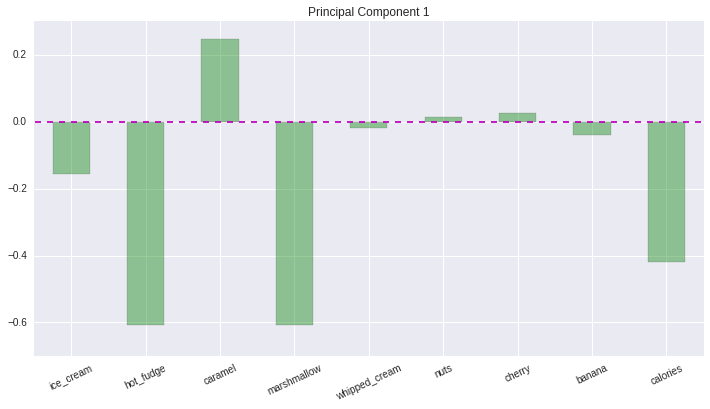

In [30]:
#Plot just PC1
figure = plt.figure(figsize=(12,6))
ax = figure.add_subplot(111)

#plot PC1
meanPCs.iloc[1].plot(ax=ax,kind='bar',alpha=0.4,color='g')

#add horizontal dashed line at 0
xzero = range(-1,10)
zero = [0 for xi in xzero]
ax.plot(xzero,zero,'m--')

ax.set_title('Principal Component 1')
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=25)
plt.show()

By evaluating how different features contribute to the PCs, we can say something about important relationships in our data.  Any features that have the same sign (positive or negative) are positively correlated.  Features with opposite signs are anticorrelated.  The value of each feature's contribution tells you how strong those relationships are.  PC1 will include the correlations that describe the most variation among your data.  

For ice cream sundaes in this data set, for example, one of the most important relationships is a strong correlation between the amount of hot fudge and marshmallow fluff.

What are the most important relationships that differentiate one sundae from another?  (I.e. ALL the relationships represented in PC1.)  Talk with your group then post your answer on Slack.

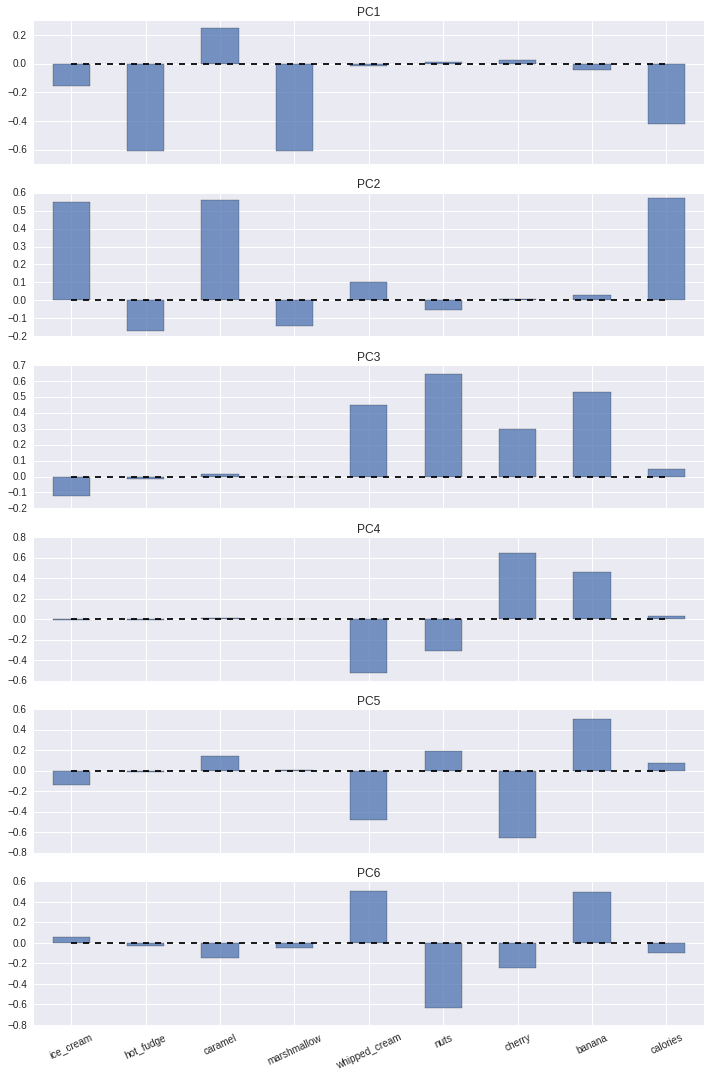

In [32]:
fig = plt.figure(figsize=(12,18))
for i in range(numPCs):
    ax = fig.add_subplot(numPCs,1,i+1)
    meanPCs.iloc[i+1].T.plot(sharex=True,ax=ax,kind='bar',alpha=0.75)
    zero = [0 for x in pca_df.columns]
    xzero = range(len(zero))
    ax.plot(xzero,zero,'k--')
    ax.set_title('PC'+str(i+1))

ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=25)
plt.show()

### Predictive modeling

If we were to use this data set for predictive modeling, we would likely want to use the ingredient features to predict the calories.  Given that, can you glean any further information from the PC plots?  Would you revise the number of components you want to keep?  What else might you consider?